Gerekli Kütüphanelerin İndirilmesi

In [ ]:
!pip install ultralytics #model eğitme için
!pip install torch torchvision torchaudio
!pip install onnxruntime #eğitilen modelin onnx formatında kullanılması için
!pip install numpy      # eğitilen modele uygun girdi dönüşümü için
!pip install opencv-python   #eğitilen modele uygun girdi dönüşümü için
!pip install matplotlib # eğitilen modelin başarım analizinin görselleştirilmesi için

Modeli Eğitmek veya Eğitilen modeli kullanmak İçin Gerekliliklerin DRIVE dan alınması

In [ ]:
from google.colab import drive
import zipfile
import os
import onnxruntime

drive.mount('/content/drive')  #drive'ı content altına ekle
#-------------------------------------------------------------------
#DATASET dahil etme
# Zip dosyasının yolu
zip_file_path = '/content/drive/MyDrive/yolov8/dataset.zip'
# Çıkartılacak hedef dizin
target_dir = '/content/dataset'

# Zip dosyasını çıkartma
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(target_dir)
#----------------------------------------------------------------------
#Drıvedaki eğitim için gerekli yaml dosyasını content altına kopyala
!cp /content/drive/MyDrive/yolov8/dataset.yaml /content/
#----------------------------------------------------------------------
#Eğitilen modeli dahil etme
# onnx_model_path = '/content/runs/classify/train3/weights/best.onnx'
# ort_session = onnxruntime.InferenceSession(onnx_model_path)


Mounted at /content/drive


In [ ]:
#Eğitilen modeli dahil etme
onnx_model_path = '/content/runs/classify/train3/weights/best.onnx'
ort_session = onnxruntime.InferenceSession(onnx_model_path)

In [ ]:
from ultralytics import YOLO

# Modeli Yükle
model = YOLO('yolov8n-cls.yaml').load('yolov8n-cls.pt')  # build from YAML and transfer weights
# Modeli dataset ile eğit
results = model.train(data='/content/dataset/dataset', epochs=10, imgsz=40)

YOLOv8n-cls summary: 99 layers, 2719288 parameters, 2719288 gradients, 4.4 GFLOPs


100%|██████████| 5.30M/5.30M [00:00<00:00, 21.8MB/s]


Transferred 158/158 items from pretrained weights
Ultralytics YOLOv8.2.3 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=classify, mode=train, model=yolov8n-cls.yaml, data=/content/dataset/dataset, epochs=10, time=None, patience=100, batch=16, imgsz=40, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_

train: Scanning /content/dataset/dataset/train... 2250 images, 0 corrupt: 100%|██████████| 2250/2250 [00:00<00:00, 4392.51it/s]

train: New cache created: /content/dataset/dataset/train.cache



val: Scanning /content/dataset/dataset/test... 450 images, 0 corrupt: 100%|██████████| 450/450 [00:00<00:00, 5318.66it/s]

val: New cache created: /content/dataset/dataset/test.cache


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 26 weight(decay=0.0), 27 weight(decay=0.0005), 27 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 64 train, 64 val
Using 0 dataloader workers
Logging results to runs/classify/train
Starting training for 10 epochs...

      Epoch    GPU_mem       loss  Instances       Size


       1/10         0G      1.224         16         64:   9%|▉         | 13/141 [00:02<00:21,  6.04it/s]

       1/10         0G      1.219         16         64:  18%|█▊        | 25/141 [00:04<00:18,  6.14it/s]
  0%|          | 0.00/755k [00:00<?, ?B/s]
100%|██████████| 755k/755k [00:00<00:00, 4.79MB/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:01<00:00, 12.13it/s]

                   all       0.98          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:01<00:00, 14.33it/s]

                   all      0.993          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:01<00:00,  8.95it/s]

                   all      0.991          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:01<00:00,  9.76it/s]

                   all      0.998          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:01<00:00, 14.36it/s]

                   all      0.996          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:02<00:00,  5.44it/s]

                   all      0.998          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:01<00:00, 14.22it/s]

                   all      0.998          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:01<00:00, 11.79it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:02<00:00,  5.93it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


      10/10         0G    0.08167         10         64: 100%|██████████| 141/141 [00:37<00:00,  3.72it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:01<00:00, 13.88it/s]

                   all          1          1



10 epochs completed in 0.090 hours.
Optimizer stripped from runs/classify/train/weights/last.pt, 3.0MB
Optimizer stripped from runs/classify/train/weights/best.pt, 3.0MB

Validating runs/classify/train/weights/best.pt...
Ultralytics YOLOv8.2.3 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv8n-cls summary (fused): 73 layers, 1438723 parameters, 0 gradients, 3.3 GFLOPs
WARNING ⚠️ Dataset 'split=val' not found, using 'split=test' instead.
train: /content/dataset/dataset/train... found 2250 images in 3 classes ✅ 
val: None...
test: /content/dataset/dataset/test... found 450 images in 3 classes ✅ 


               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:02<00:00,  7.40it/s]


                   all          1          1
Speed: 0.0ms preprocess, 2.1ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train
Results saved to runs/classify/train


In [ ]:
from ultralytics import YOLO

# Önceden eğitilmiş modeli yükle
model = YOLO("/content/runs/classify/train/weights/best.pt")

# Doğrulama veri kümesini tanımla

data= ("/content/dataset")
# Doğrulama metrilerini hesapla
metrics = model.train()

# En iyi 1 ve 5 doğruluk oranlarını yazdır
print("En iyi 1 doğruluk:", metrics.top1)
# print("En iyi 5 doğruluk:", metrics.top5)

#eğitilmiş modeli onnx formatına çevir (pt formatından)

model = YOLO("/content/runs/classify/train2/weights/best.pt")
model.export(format='onnx')

Ultralytics YOLOv8.2.3 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=classify, mode=train, model=/content/runs/classify/train/weights/best.pt, data=/content/dataset/dataset, epochs=100, time=None, patience=100, batch=16, imgsz=64, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_lab

train: Scanning /content/dataset/dataset/train... 2250 images, 0 corrupt: 100%|██████████| 2250/2250 [00:00<?, ?it/s]
val: Scanning /content/dataset/dataset/test... 450 images, 0 corrupt: 100%|██████████| 450/450 [00:00<?, ?it/s]

optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 26 weight(decay=0.0), 27 weight(decay=0.0005), 27 bias(decay=0.0)


TensorBoard: model graph visualization added ✅
Image sizes 64 train, 64 val
Using 0 dataloader workers
Logging results to runs/classify/train2
Starting training for 100 epochs...

      Epoch    GPU_mem       loss  Instances       Size


      1/100         0G    0.05715         10         64: 100%|██████████| 141/141 [00:27<00:00,  5.20it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:01<00:00, 13.79it/s]

                   all      0.998          1



      Epoch    GPU_mem       loss  Instances       Size


      2/100         0G    0.06889         10         64: 100%|██████████| 141/141 [00:27<00:00,  5.17it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:01<00:00, 13.98it/s]

                   all      0.998          1



      Epoch    GPU_mem       loss  Instances       Size


      3/100         0G    0.07072         10         64: 100%|██████████| 141/141 [00:24<00:00,  5.87it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:01<00:00, 14.11it/s]

                   all      0.998          1



      Epoch    GPU_mem       loss  Instances       Size


      4/100         0G    0.08978         10         64: 100%|██████████| 141/141 [00:23<00:00,  5.98it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:01<00:00, 13.40it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


      5/100         0G    0.07093         10         64: 100%|██████████| 141/141 [00:22<00:00,  6.29it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:01<00:00, 11.06it/s]

                   all      0.996          1



      Epoch    GPU_mem       loss  Instances       Size


      6/100         0G     0.1424         10         64: 100%|██████████| 141/141 [00:22<00:00,  6.21it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:02<00:00,  7.23it/s]

                   all      0.991          1



      Epoch    GPU_mem       loss  Instances       Size


      7/100         0G    0.06095         10         64: 100%|██████████| 141/141 [00:21<00:00,  6.46it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:01<00:00, 13.33it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


      8/100         0G    0.05414         10         64: 100%|██████████| 141/141 [00:22<00:00,  6.21it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:01<00:00, 13.94it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


      9/100         0G    0.05973         10         64: 100%|██████████| 141/141 [00:23<00:00,  6.03it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:01<00:00, 13.95it/s]

                   all      0.998          1



      Epoch    GPU_mem       loss  Instances       Size


     10/100         0G    0.07092         10         64: 100%|██████████| 141/141 [00:22<00:00,  6.20it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:01<00:00,  9.65it/s]

                   all      0.998          1



      Epoch    GPU_mem       loss  Instances       Size


     11/100         0G    0.06857         10         64: 100%|██████████| 141/141 [00:21<00:00,  6.42it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:01<00:00, 14.22it/s]

                   all      0.996          1



      Epoch    GPU_mem       loss  Instances       Size


     12/100         0G    0.04288         10         64: 100%|██████████| 141/141 [00:22<00:00,  6.22it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:01<00:00, 13.89it/s]

                   all      0.998          1



      Epoch    GPU_mem       loss  Instances       Size


     13/100         0G    0.05194         10         64: 100%|██████████| 141/141 [00:24<00:00,  5.87it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:01<00:00, 13.65it/s]

                   all      0.998          1



      Epoch    GPU_mem       loss  Instances       Size


     14/100         0G    0.04308         10         64: 100%|██████████| 141/141 [00:21<00:00,  6.60it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:01<00:00, 11.64it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     15/100         0G    0.04331         10         64: 100%|██████████| 141/141 [00:22<00:00,  6.35it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:01<00:00, 13.96it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     16/100         0G    0.03324         10         64: 100%|██████████| 141/141 [00:22<00:00,  6.13it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:01<00:00, 13.39it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     17/100         0G    0.02501         10         64: 100%|██████████| 141/141 [00:22<00:00,  6.16it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:01<00:00,  8.10it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     18/100         0G    0.03279         10         64: 100%|██████████| 141/141 [00:22<00:00,  6.33it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:01<00:00, 13.67it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     19/100         0G    0.03223         10         64: 100%|██████████| 141/141 [00:22<00:00,  6.18it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:01<00:00, 13.35it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     20/100         0G    0.03825         10         64: 100%|██████████| 141/141 [00:22<00:00,  6.22it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:01<00:00, 14.02it/s]

                   all      0.998          1



      Epoch    GPU_mem       loss  Instances       Size


     21/100         0G    0.02328         10         64: 100%|██████████| 141/141 [00:23<00:00,  6.12it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:01<00:00, 12.05it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     22/100         0G    0.01663         10         64: 100%|██████████| 141/141 [00:22<00:00,  6.33it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:01<00:00, 13.32it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     23/100         0G    0.04028         10         64: 100%|██████████| 141/141 [00:22<00:00,  6.22it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:01<00:00, 14.15it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     24/100         0G    0.03078         10         64: 100%|██████████| 141/141 [00:22<00:00,  6.40it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:01<00:00,  9.54it/s]

                   all      0.998          1



      Epoch    GPU_mem       loss  Instances       Size


     25/100         0G    0.03269         10         64: 100%|██████████| 141/141 [00:22<00:00,  6.20it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:01<00:00, 12.41it/s]

                   all      0.998          1



      Epoch    GPU_mem       loss  Instances       Size


     26/100         0G    0.03381         10         64: 100%|██████████| 141/141 [00:22<00:00,  6.28it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:01<00:00, 14.02it/s]

                   all      0.998          1



      Epoch    GPU_mem       loss  Instances       Size


     27/100         0G     0.0288         10         64: 100%|██████████| 141/141 [00:22<00:00,  6.17it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:01<00:00, 13.80it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     28/100         0G     0.0361         10         64: 100%|██████████| 141/141 [00:22<00:00,  6.33it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:01<00:00,  7.99it/s]

                   all      0.998          1



      Epoch    GPU_mem       loss  Instances       Size


     29/100         0G    0.02557         10         64: 100%|██████████| 141/141 [00:23<00:00,  6.02it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:01<00:00, 13.13it/s]

                   all      0.998          1



      Epoch    GPU_mem       loss  Instances       Size


     30/100         0G    0.02057         10         64: 100%|██████████| 141/141 [00:22<00:00,  6.26it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:01<00:00, 13.87it/s]

                   all      0.998          1



      Epoch    GPU_mem       loss  Instances       Size


     31/100         0G    0.02211         10         64: 100%|██████████| 141/141 [00:22<00:00,  6.18it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:01<00:00, 13.58it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     32/100         0G    0.02792         10         64: 100%|██████████| 141/141 [00:23<00:00,  5.92it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:01<00:00,  9.83it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     33/100         0G    0.01664         10         64: 100%|██████████| 141/141 [00:21<00:00,  6.53it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:01<00:00, 13.63it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     34/100         0G    0.03253         10         64: 100%|██████████| 141/141 [00:22<00:00,  6.20it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:01<00:00, 13.49it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     35/100         0G    0.02557         10         64: 100%|██████████| 141/141 [00:22<00:00,  6.25it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:01<00:00, 14.13it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     36/100         0G    0.02316         10         64: 100%|██████████| 141/141 [00:23<00:00,  5.92it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:01<00:00, 10.99it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     37/100         0G    0.01454         10         64: 100%|██████████| 141/141 [00:21<00:00,  6.50it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:01<00:00, 13.38it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     38/100         0G    0.02325         10         64: 100%|██████████| 141/141 [00:22<00:00,  6.15it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:01<00:00, 13.36it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     39/100         0G    0.02411         10         64: 100%|██████████| 141/141 [00:24<00:00,  5.81it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:01<00:00, 13.34it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     40/100         0G      0.025         10         64: 100%|██████████| 141/141 [00:22<00:00,  6.16it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:01<00:00, 13.40it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     41/100         0G    0.03031         10         64: 100%|██████████| 141/141 [00:21<00:00,  6.50it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:01<00:00,  9.58it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     42/100         0G     0.0235         10         64: 100%|██████████| 141/141 [00:22<00:00,  6.40it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:01<00:00, 13.93it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     43/100         0G    0.01751         10         64: 100%|██████████| 141/141 [00:22<00:00,  6.15it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:01<00:00,  9.13it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     44/100         0G     0.0195         10         64: 100%|██████████| 141/141 [00:23<00:00,  6.03it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:01<00:00, 14.04it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     45/100         0G    0.02169         10         64: 100%|██████████| 141/141 [00:21<00:00,  6.53it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:01<00:00, 10.19it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     46/100         0G     0.0294         10         64: 100%|██████████| 141/141 [00:23<00:00,  6.09it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:01<00:00, 13.41it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     47/100         0G     0.0137         10         64: 100%|██████████| 141/141 [00:22<00:00,  6.18it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:01<00:00, 13.66it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     48/100         0G    0.02016         10         64: 100%|██████████| 141/141 [00:22<00:00,  6.22it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:01<00:00, 11.53it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     49/100         0G    0.02317         10         64: 100%|██████████| 141/141 [00:21<00:00,  6.56it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:01<00:00, 13.40it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     50/100         0G     0.0172         10         64: 100%|██████████| 141/141 [00:22<00:00,  6.28it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:01<00:00, 13.92it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     51/100         0G    0.01761         10         64: 100%|██████████| 141/141 [00:24<00:00,  5.83it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:01<00:00, 13.75it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     52/100         0G    0.03611         10         64: 100%|██████████| 141/141 [00:23<00:00,  6.12it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:01<00:00, 12.92it/s]

                   all      0.998          1



      Epoch    GPU_mem       loss  Instances       Size


     53/100         0G    0.01747         10         64: 100%|██████████| 141/141 [00:23<00:00,  6.07it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:01<00:00,  9.99it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     54/100         0G     0.0247         10         64: 100%|██████████| 141/141 [00:21<00:00,  6.49it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:01<00:00, 14.22it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     55/100         0G    0.02225         10         64: 100%|██████████| 141/141 [00:22<00:00,  6.21it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:01<00:00, 13.30it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     56/100         0G    0.01483         10         64: 100%|██████████| 141/141 [00:22<00:00,  6.18it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:01<00:00, 13.97it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     57/100         0G    0.01755         10         64: 100%|██████████| 141/141 [00:21<00:00,  6.44it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:01<00:00, 10.15it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     58/100         0G    0.01738         10         64: 100%|██████████| 141/141 [00:23<00:00,  6.02it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:01<00:00, 13.54it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     59/100         0G    0.01829         10         64: 100%|██████████| 141/141 [00:22<00:00,  6.14it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:01<00:00, 13.61it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     60/100         0G    0.01616         10         64: 100%|██████████| 141/141 [00:23<00:00,  5.91it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:01<00:00,  9.87it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     61/100         0G    0.01921         10         64: 100%|██████████| 141/141 [00:22<00:00,  6.35it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:01<00:00,  9.13it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     62/100         0G    0.01942         10         64: 100%|██████████| 141/141 [00:21<00:00,  6.50it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:01<00:00, 13.97it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     63/100         0G    0.01503         10         64: 100%|██████████| 141/141 [00:22<00:00,  6.18it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:01<00:00, 14.08it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     64/100         0G    0.01867         10         64: 100%|██████████| 141/141 [00:22<00:00,  6.16it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:01<00:00, 13.32it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     65/100         0G    0.01628         10         64: 100%|██████████| 141/141 [00:21<00:00,  6.42it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:01<00:00, 10.02it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     66/100         0G    0.01794         10         64: 100%|██████████| 141/141 [00:23<00:00,  6.11it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:01<00:00, 14.03it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     67/100         0G    0.01334         10         64: 100%|██████████| 141/141 [00:24<00:00,  5.87it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:01<00:00, 13.38it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     68/100         0G    0.01697         10         64: 100%|██████████| 141/141 [00:22<00:00,  6.17it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:01<00:00, 13.93it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     69/100         0G    0.02112         10         64: 100%|██████████| 141/141 [00:22<00:00,  6.21it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:01<00:00, 11.18it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     70/100         0G    0.01333         10         64: 100%|██████████| 141/141 [00:21<00:00,  6.52it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:01<00:00, 13.11it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     71/100         0G    0.01944         10         64: 100%|██████████| 141/141 [00:22<00:00,  6.21it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:01<00:00, 14.19it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     72/100         0G    0.02293         10         64: 100%|██████████| 141/141 [00:22<00:00,  6.16it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:01<00:00, 13.80it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     73/100         0G    0.01603         10         64: 100%|██████████| 141/141 [00:24<00:00,  5.82it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:01<00:00, 12.18it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     74/100         0G   0.008539         10         64: 100%|██████████| 141/141 [00:23<00:00,  6.04it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:01<00:00,  9.93it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     75/100         0G    0.01573         10         64: 100%|██████████| 141/141 [00:22<00:00,  6.38it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:01<00:00, 13.74it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     76/100         0G    0.01741         10         64: 100%|██████████| 141/141 [00:22<00:00,  6.14it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:01<00:00, 13.43it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     77/100         0G   0.009026         10         64: 100%|██████████| 141/141 [00:22<00:00,  6.17it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:01<00:00, 13.60it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     78/100         0G    0.01225         10         64: 100%|██████████| 141/141 [00:21<00:00,  6.50it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:01<00:00,  9.67it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     79/100         0G    0.01516         10         64: 100%|██████████| 141/141 [00:22<00:00,  6.35it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:01<00:00, 13.50it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     80/100         0G    0.01829         10         64: 100%|██████████| 141/141 [00:24<00:00,  5.76it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:01<00:00, 13.81it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     81/100         0G    0.01217         10         64: 100%|██████████| 141/141 [00:23<00:00,  5.88it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:01<00:00, 13.82it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     82/100         0G    0.01508         10         64: 100%|██████████| 141/141 [00:21<00:00,  6.43it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:01<00:00,  9.38it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     83/100         0G   0.008247         10         64: 100%|██████████| 141/141 [00:21<00:00,  6.51it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:01<00:00, 13.86it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     84/100         0G    0.01624         10         64: 100%|██████████| 141/141 [00:22<00:00,  6.19it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:01<00:00, 14.08it/s]

                   all      0.998          1



      Epoch    GPU_mem       loss  Instances       Size


     85/100         0G    0.01765         10         64: 100%|██████████| 141/141 [00:22<00:00,  6.14it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:01<00:00, 13.47it/s]

                   all      0.998          1



      Epoch    GPU_mem       loss  Instances       Size


     86/100         0G    0.01294         10         64: 100%|██████████| 141/141 [00:22<00:00,  6.40it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:01<00:00,  9.90it/s]

                   all      0.998          1



      Epoch    GPU_mem       loss  Instances       Size


     87/100         0G    0.01567         10         64: 100%|██████████| 141/141 [00:21<00:00,  6.42it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:01<00:00, 14.06it/s]

                   all      0.998          1



      Epoch    GPU_mem       loss  Instances       Size


     88/100         0G    0.01202         10         64: 100%|██████████| 141/141 [00:25<00:00,  5.45it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:01<00:00, 13.36it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     89/100         0G    0.01482         10         64: 100%|██████████| 141/141 [00:22<00:00,  6.18it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:01<00:00, 13.97it/s]

                   all      0.998          1



      Epoch    GPU_mem       loss  Instances       Size


     90/100         0G   0.007066         10         64: 100%|██████████| 141/141 [00:22<00:00,  6.39it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:01<00:00, 10.31it/s]

                   all      0.998          1



      Epoch    GPU_mem       loss  Instances       Size


     91/100         0G    0.01611         10         64: 100%|██████████| 141/141 [00:22<00:00,  6.36it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:01<00:00, 13.35it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     92/100         0G   0.006793         10         64: 100%|██████████| 141/141 [00:22<00:00,  6.13it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:01<00:00, 13.84it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     93/100         0G    0.01001         10         64: 100%|██████████| 141/141 [00:22<00:00,  6.17it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:01<00:00, 13.91it/s]

                   all      0.998          1



      Epoch    GPU_mem       loss  Instances       Size


     94/100         0G    0.01045         10         64: 100%|██████████| 141/141 [00:21<00:00,  6.48it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:01<00:00,  9.10it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     95/100         0G   0.009808         10         64: 100%|██████████| 141/141 [00:24<00:00,  5.65it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:01<00:00, 13.90it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     96/100         0G   0.009718         10         64: 100%|██████████| 141/141 [00:23<00:00,  6.10it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:01<00:00, 13.63it/s]

                   all      0.998          1



      Epoch    GPU_mem       loss  Instances       Size


     97/100         0G    0.01161         10         64: 100%|██████████| 141/141 [00:22<00:00,  6.14it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:01<00:00, 13.36it/s]

                   all      0.998          1



      Epoch    GPU_mem       loss  Instances       Size


     98/100         0G    0.00617         10         64: 100%|██████████| 141/141 [00:22<00:00,  6.39it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:01<00:00,  9.64it/s]

                   all      0.998          1



      Epoch    GPU_mem       loss  Instances       Size


     99/100         0G   0.006352         10         64: 100%|██████████| 141/141 [00:22<00:00,  6.27it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:01<00:00, 13.62it/s]

                   all      0.998          1



      Epoch    GPU_mem       loss  Instances       Size


    100/100         0G      0.014         10         64: 100%|██████████| 141/141 [00:23<00:00,  6.12it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:01<00:00, 12.96it/s]

                   all      0.998          1



100 epochs completed in 0.684 hours.
Optimizer stripped from runs/classify/train2/weights/last.pt, 3.0MB
Optimizer stripped from runs/classify/train2/weights/best.pt, 3.0MB

Validating runs/classify/train2/weights/best.pt...
Ultralytics YOLOv8.2.3 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv8n-cls summary (fused): 73 layers, 1438723 parameters, 0 gradients, 3.3 GFLOPs
WARNING ⚠️ Dataset 'split=val' not found, using 'split=test' instead.
train: /content/dataset/dataset/train... found 2250 images in 3 classes ✅ 
val: None...
test: /content/dataset/dataset/test... found 450 images in 3 classes ✅ 


               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:01<00:00,  9.02it/s]


                   all          1          1
Speed: 0.0ms preprocess, 1.4ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train2
Results saved to runs/classify/train2
En iyi 1 doğruluk: 1.0
Ultralytics YOLOv8.2.3 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv8n-cls summary (fused): 73 layers, 1438723 parameters, 0 gradients, 3.3 GFLOPs

PyTorch: starting from '/content/runs/classify/train2/weights/best.pt' with input shape (1, 3, 64, 64) BCHW and output shape(s) (1, 3) (2.8 MB)
requirements: Ultralytics requirement ['onnx>=1.12.0'] not found, attempting AutoUpdate...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 46.6 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 11.9s, installed 1 package: ['onnx>=1.12.0']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.16.0 opset 17...
ONNX: export success ✅ 12.4s, saved as '/content/runs/classify/train2/weights/b

'/content/runs/classify/train2/weights/best.onnx'

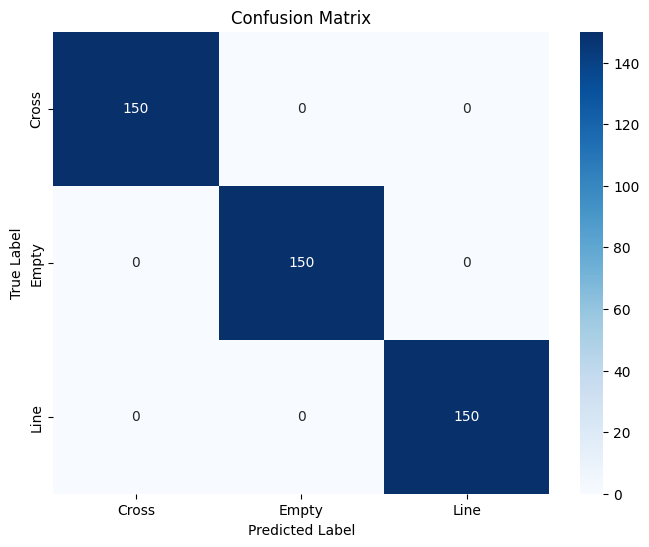

Classification Report:
              precision    recall  f1-score   support

       Cross       1.00      1.00      1.00       150
       Empty       1.00      1.00      1.00       150
        Line       1.00      1.00      1.00       150

    accuracy                           1.00       450
   macro avg       1.00      1.00      1.00       450
weighted avg       1.00      1.00      1.00       450



In [ ]:
#onnx formatındaki modeli test kümesi üzerinden değerlendir
import os
import cv2
import numpy as np
import onnxruntime
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Modelin bulunduğu yol
model_path = '/content/runs/classify/train2/weights/best.onnx'

# Ana klasörün yolunu belirtin (her alt klasör bir sınıf olarak kabul edilecek)
root_folder = '/content/dataset/dataset/test/'

# Modeli yükle
sess = onnxruntime.InferenceSession(model_path)

# Modelin giriş boyutlarını al
input_name = sess.get_inputs()[0].name
input_shape = tuple(sess.get_inputs()[0].shape[2:])  # Girişin genişlik ve yüksekliği

# Sınıf etiketlerini al
class_labels = sorted(os.listdir(root_folder))  # Ana klasördeki alt klasörler sınıf etiketlerini temsil eder
num_classes = len(class_labels)

# Sınıflandırma işlemi için fonksiyon tanımla
def classify_image(image_path):
    # Resmi oku ve boyutlandır
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Renk formatını BGR'den RGB'ye çevir
    img = cv2.resize(img, input_shape)          # Modelin beklediği boyuta yeniden boyutlandır
    img = img.astype(np.float32) / 255.0        # 0-1 aralığına normalize et

    # Model için giriş verisini hazırla
    img = np.transpose(img, (2, 0, 1))           # CHW formatına dönüştür
    img = np.expand_dims(img, axis=0)            # Batch boyutunu ekleyerek 4B1C formatına getir

    # Modeli kullanarak sınıflandırma yap
    result = sess.run(None, {input_name: img})

    # Sınıflandırma sonuçlarını al
    if result:
        predicted_class_index = np.argmax(result)  # En yüksek olasılığa sahip sınıfın indeksini bul
        return predicted_class_index

    return None

# Gerçek ve tahmin edilen etiketleri saklamak için listeler oluştur
true_labels = []
predicted_labels = []

# Her bir sınıf için alt klasörleri dolaş
for class_index, class_label in enumerate(class_labels):
    class_folder = os.path.join(root_folder, class_label)

    # Sınıf alt klasöründeki fotoğrafları işle
    for filename in os.listdir(class_folder):
        if filename.endswith(".png") or filename.endswith(".jpg"):
            image_path = os.path.join(class_folder, filename)
            predicted_class_index = classify_image(image_path)

            if predicted_class_index is not None:
                true_labels.append(class_index)  # Gerçek sınıfın indeksi
                predicted_labels.append(predicted_class_index)  # Tahmin edilen sınıfın indeksi

# Confusion matrix'i oluştur
cm = confusion_matrix(true_labels, predicted_labels)

# Sınıf etiketlerini heatmap için düzenle
class_labels = [label.capitalize() for label in class_labels]  # Sınıf etiketlerini büyük harfle yazdır

# Heatmap'i oluştur
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

from sklearn.metrics import classification_report
# Sınıflandırma raporunu oluştur
report = classification_report(true_labels, predicted_labels, target_names=class_labels)

# Raporu yazdır
print("Classification Report:")
print(report)



**TAMAMEN HAZIR MODELİ DEĞERLENDİRME**

In [ ]:
from google.colab import drive
import zipfile
import os
import onnxruntime

drive.mount('/content/drive')  #drive'ı content altına ekle
#-------------------------------------------------------------------
#test edileecek datayı dahil etme
# Zip dosyasının yolu
zip_file_path = '/content/drive/MyDrive/yolov8/test.zip'
# Çıkartılacak hedef dizin
target_dir = '/content/test'

# Zip dosyasını çıkartma
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(target_dir)
#----------------------------------------------------------------------
#Hazır modeli drivedan dahil etme
!cp /content/drive/MyDrive/yolov8/best.onnx /content/
#----------------------------------------------------------------------


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


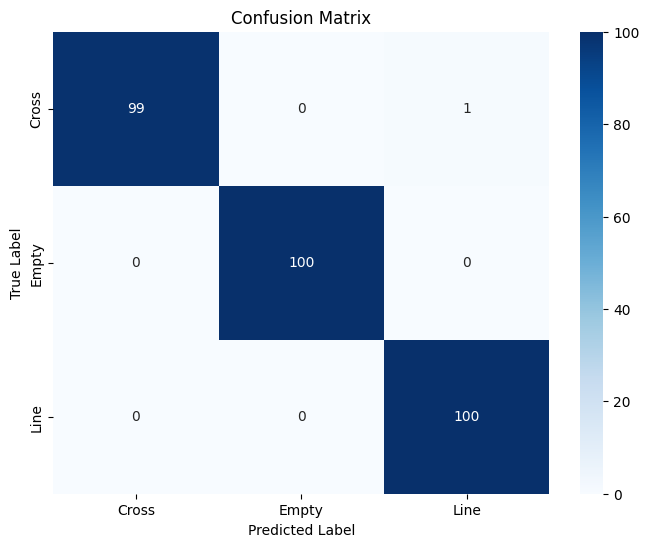

Classification Report:
              precision    recall  f1-score   support

       Cross       1.00      0.99      0.99       100
       Empty       1.00      1.00      1.00       100
        Line       0.99      1.00      1.00       100

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



In [ ]:
#onnx formatındaki modeli test kümesi üzerinden değerlendir
import os
import cv2
import numpy as np
import onnxruntime
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Modelin bulunduğu yol
model_path = '/content/best.onnx'

# Ana klasörün yolunu belirtin (her alt klasör bir sınıf olarak kabul edilecek)
root_folder = '/content/test/test/'

# Modeli yükle
sess = onnxruntime.InferenceSession(model_path)

# Modelin giriş boyutlarını al
input_name = sess.get_inputs()[0].name
input_shape = tuple(sess.get_inputs()[0].shape[2:])  # Girişin genişlik ve yüksekliği

# Sınıf etiketlerini al
class_labels = sorted(os.listdir(root_folder))  # Ana klasördeki alt klasörler sınıf etiketlerini temsil eder
num_classes = len(class_labels)

# Sınıflandırma işlemi için fonksiyon tanımla
def classify_image(image_path):
    # Resmi oku ve boyutlandır
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Renk formatını BGR'den RGB'ye çevir
    img = cv2.resize(img, input_shape)          # Modelin beklediği boyuta yeniden boyutlandır
    img = img.astype(np.float32) / 255.0        # 0-1 aralığına normalize et

    # Model için giriş verisini hazırla
    img = np.transpose(img, (2, 0, 1))           # CHW formatına dönüştür
    img = np.expand_dims(img, axis=0)            # Batch boyutunu ekleyerek 4B1C formatına getir

    # Modeli kullanarak sınıflandırma yap
    result = sess.run(None, {input_name: img})

    # Sınıflandırma sonuçlarını al
    if result:
        predicted_class_index = np.argmax(result)  # En yüksek olasılığa sahip sınıfın indeksini bul
        return predicted_class_index

    return None

# Gerçek ve tahmin edilen etiketleri saklamak için listeler oluştur
true_labels = []
predicted_labels = []

# Her bir sınıf için alt klasörleri dolaş
for class_index, class_label in enumerate(class_labels):
    class_folder = os.path.join(root_folder, class_label)

    # Sınıf alt klasöründeki fotoğrafları işle
    for filename in os.listdir(class_folder):
        if filename.endswith(".png") or filename.endswith(".jpg"):
            image_path = os.path.join(class_folder, filename)
            predicted_class_index = classify_image(image_path)

            if predicted_class_index is not None:
                true_labels.append(class_index)  # Gerçek sınıfın indeksi
                predicted_labels.append(predicted_class_index)  # Tahmin edilen sınıfın indeksi

# Confusion matrix'i oluştur
cm = confusion_matrix(true_labels, predicted_labels)

# Sınıf etiketlerini heatmap için düzenle
class_labels = [label.capitalize() for label in class_labels]  # Sınıf etiketlerini büyük harfle yazdır

# Heatmap'i oluştur
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

from sklearn.metrics import classification_report
# Sınıflandırma raporunu oluştur
report = classification_report(true_labels, predicted_labels, target_names=class_labels)

# Raporu yazdır
print("Classification Report:")
print(report)

In [ ]:
#başarım ölçütlerini indir
import os
from google.colab import files

# İndirilecek dizin
directory_to_zip = '/content/runs/'

# Geçici bir zip dosyası oluştur
zip_file_path = '/content/runs.zip'

# Dizin içeriğini zip dosyasına sıkıştır
os.system(f"zip -r {zip_file_path} {directory_to_zip}")

# Zip dosyasını indir
files.download(zip_file_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>